In [78]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [79]:
class BaggingClassifier:
    def __init__(self, base_classifier, n_estimators, max_leaf_nodes=None, max_depth=None):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.max_leaf_nodes = max_leaf_nodes
        self.max_depth = max_depth
        self.classifiers = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling with replacement
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sampled = X[indices]
            y_sampled = y[indices]

            # Create a new base classifier and train it on the sampled data
            classifier = self.base_classifier.__class__()
            classifier.fit(X_sampled, y_sampled)

            # Store the trained classifier in the list of classifiers
            self.classifiers.append(classifier)
        return self.classifiers

    def predict(self, X):
        # Make predictions using all the base classifiers
        predictions = [classifier.predict(X) for classifier in self.classifiers]

        # Aggregate predictions using majority voting for classification
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

        return majority_votes

In [80]:
dataset = datasets.load_iris()

In [81]:
X = dataset.data[:, :2]
y = dataset.target

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Create the base classifier
dc = DecisionTreeClassifier()

In [84]:
# Single Decision Tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
single_tree_pred = single_tree.predict(X_test)
single_tree_accuracy = accuracy_score(y_test, single_tree_pred)

In [85]:
single_tree_accuracy

0.6666666666666666

In [86]:
# Bagging with Decision Tree
model = BaggingClassifier(base_classifier=dc, n_estimators=1000)
classifiers = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
bagging_tree_accuracy = accuracy_score(y_test, y_pred)

In [87]:
bagging_tree_accuracy

0.7333333333333333

In [88]:
# Create a bar plot for accuracy comparison
models = ['Single Decision Tree', 'Bagging with Decision Tree']
accuracies = [single_tree_accuracy, bagging_tree_accuracy]

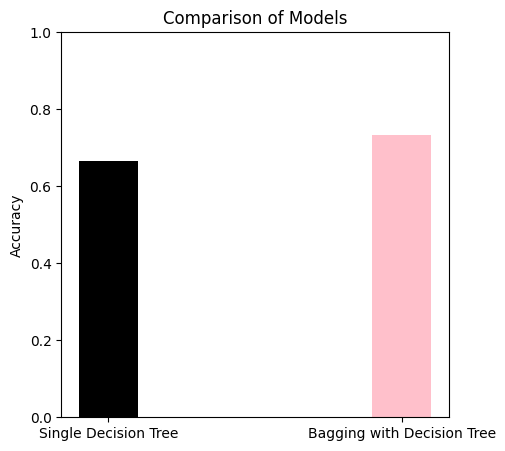

In [89]:
plt.figure(figsize=(5, 5))
plt.bar(models, accuracies, color=['black', 'pink'], width=0.2)
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.ylim(0.0, 1.0)
plt.show()

In [91]:
print(accuracies)

[0.6666666666666666, 0.7333333333333333]
